,income,age,loan_amount,approved
0,30,25,5,1
1,40,45,15,1
2,45,35,20,1
3,20,21,5,0
4,35,27,30,0


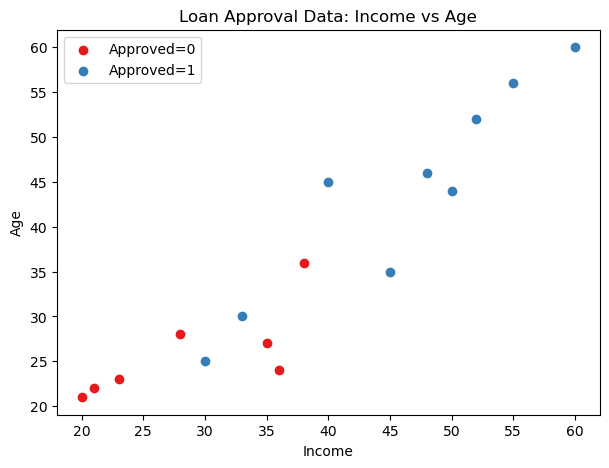

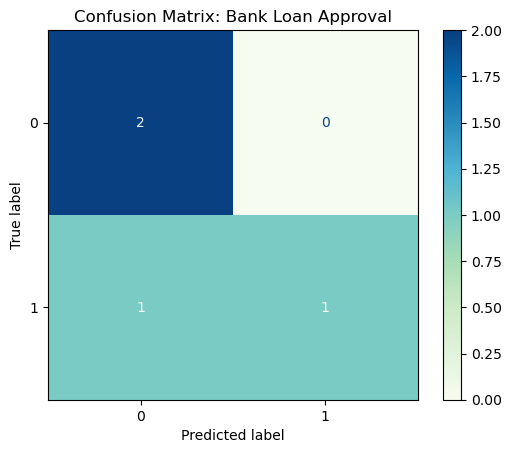

Test Accuracy: 0.75


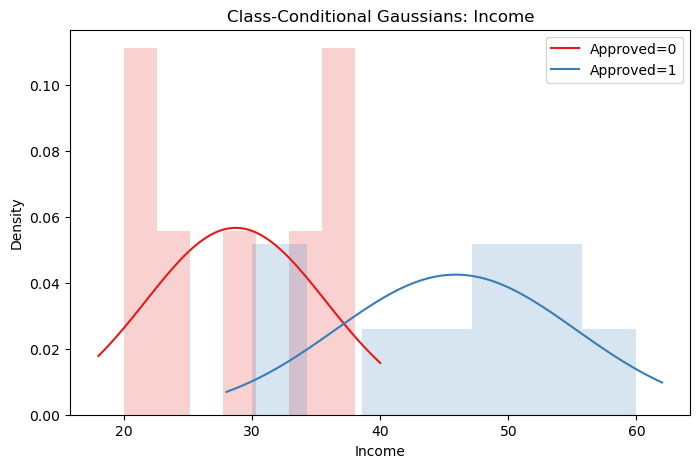

In [3]:
# Using Gaussian naive bayes we have to do Bank Loan Approval Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# STEP 1: Write the Dataset
# Columns: ('income', 'age', 'loan_amount', 'approved')
data = [
    [30, 25, 5, 1],
    [40, 45, 15, 1],
    [45, 35, 20, 1],
    [20, 21, 5, 0],
    [35, 27, 30, 0],
    [52, 52, 40, 1],
    [23, 23, 7, 0],
    [28, 28, 10, 0],
    [48, 46, 12, 1],
    [33, 30, 15, 1],
    [36, 24, 7, 0],
    [55, 56, 18, 1],
    [21, 22, 2, 0],
    [38, 36, 25, 0],
    [50, 44, 22, 1],
    [60, 60, 12, 1],
]
columns = ['income', 'age', 'loan_amount', 'approved']
df = pd.DataFrame(data, columns=columns)
display(df.head())

# STEP 2: Visualization
plt.figure(figsize=(7, 5))
for val, color in zip([0, 1], ['#e41a1c', '#377eb8']):
    plt.scatter(
        df[df['approved'] == val]['income'],
        df[df['approved'] == val]['age'],
        label=f"Approved={val}",
        c=color
    )
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Loan Approval Data: Income vs Age')
plt.legend()
plt.show()

# STEP 3: Train/Test Split
X = df[['income', 'age', 'loan_amount']].values
y = df['approved'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y)

# STEP 4: Gaussian Naive Bayes from scratch
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.labels = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}
        for label in self.labels:
            X_class = X[y == label]
            self.means[label] = X_class.mean(axis=0)
            self.vars[label] = X_class.var(axis=0)
            self.priors[label] = X_class.shape[0] / X.shape[0]
    def _gaussian(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        # Add a small value to var for numerical stability
        numerator = np.exp(- (x - mean)**2 / (2 * (var + 1e-6)))
        denominator = np.sqrt(2 * np.pi * (var + 1e-6))
        return numerator / denominator
    def predict_row(self, x):
        log_probs = []
        for c in self.labels:
            log_prior = np.log(self.priors[c])
            log_likelihood = np.sum(np.log(self._gaussian(c, x)))
            log_probs.append(log_prior + log_likelihood)
        return self.labels[np.argmax(log_probs)]
    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])

gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# STEP 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix: Bank Loan Approval")
plt.show()

# STEP 6: Accuracy
accuracy = (y_pred == y_test).mean()
print(f"Test Accuracy: {accuracy:.2f}")

# STEP 7 (Optional): Feature distribution
from scipy.stats import norm

plt.figure(figsize=(8,5))
for label, color in zip([0,1], ['#e41a1c','#377eb8']):
    vals = X[y == label, 0]  # income
    mean = vals.mean()
    std = vals.std()
    rng = np.linspace(vals.min() - 2, vals.max() + 2, 100)
    plt.plot(rng, norm.pdf(rng, mean, std), color=color, label=f'Approved={label}')
    plt.hist(vals, bins=7, density=True, alpha=0.2, color=color)
plt.xlabel("Income")
plt.ylabel("Density")
plt.title("Class-Conditional Gaussians: Income")
plt.legend()
plt.show()
